importing Jupyter notebook from initialRankingAlgos.ipynb
[5]
[2]
True
[0.47222222 0.05555556 0.22222222 0.08333333 0.08333333 0.05555556
 0.02777778]
[(0, {'weight': 0.4722222222222222}), (1, {'weight': 0.05555555555555555}), (2, {'weight': 0.2222222222222222}), (6, {'weight': 0.027777777777777776}), (3, {'weight': 0.08333333333333333}), (4, {'weight': 0.08333333333333333}), (5, {'weight': 0.05555555555555555})]
[0.375  0.0625 0.25   0.125  0.125  0.0625 0.    ]
[0]
[1, 5]
[[0.  0.  0.  0.  0.  0.  1. ]
 [0.5 0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  1.  1.  0.  0. ]
 [0.  1.  0.  0.  0.  1.  0. ]]
[0.25   0.125  0.125  0.0625 0.0625 0.125  0.25  ]
2.3590712984783533
0.5897678246195885
0.2948839123097938
0.2948839123097939
0.1474419561548972
0.1474419561548971
0.29488391230979405
0.589767824619589
[0.25   0.125  0.125  0.0625 0.0625 0.125  0.25  ]


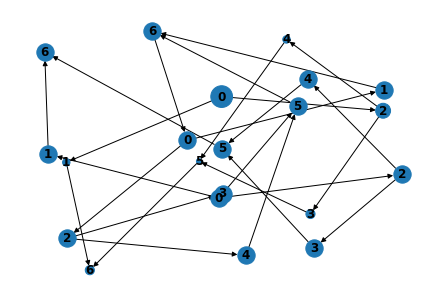

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
 
import random

import import_ipynb
from initialRankingAlgos import resetWeights
from initialRankingAlgos import addWeights
from initialRankingAlgos import addWeightsSuccessors
from initialRankingAlgos import getWeightsPageRank
from initialRankingAlgos import addWeightsToGraph

In [2]:
#From https://ipyparallel.readthedocs.io/en/latest/dag_dependencies.html
#Finished DAG initialization

def random_finished_dag(nodes, edges):
    """Generate a random Directed Acyclic Graph (DAG) with a given number of nodes and edges."""
    G = nx.DiGraph()
    M = np.zeros((nodes+1, nodes+1))
    for i in range(nodes):
        G.add_node(i)
    while edges > 0:
        a = random.randint(0,nodes-1)
        b=a
        while b==a:
            b = random.randint(0,nodes-1)
        add_edge(G, M, a, b)
        if nx.is_directed_acyclic_graph(G):
            edges -= 1
        else:
            # we closed a loop!
            remove_edge(G, M, a, b)
    finalize_dag(G, M)
    return G, M

def finalize_dag(DG, M):
    last_nodes = get_last_nodes(DG)
    final_node_num = len(DG.nodes)
    DG.add_node(final_node_num)
    for i in last_nodes:
        #DG.add_edge(i,final_node_num)
        add_edge(DG, M, i, final_node_num)
    
def get_last_nodes(DG):
    last_nodes = set()
    for i in DG.nodes:
        if not (nx.descendants(DG, i)):
            last_nodes.add(i)
    return last_nodes

def get_first_nodes(DG):
    last_nodes = set()
    for i in DG.nodes:
        if not (list(DG.predecessors(i))):
            last_nodes.add(i)
    return last_nodes

def add_edge(G, M, a, b):
    G.add_edge(a,b)
    M[a][b] = 1
    
def remove_edge(G, M, a, b):
    G.remove_edge(a,b)
    M[a][b] = 0

In [3]:
#Matrix methods

def initGraph(M):
    N = len(M)
    DG = nx.DiGraph()
    for i in range(0, N):
        for j in range(0, N):
            if (M[i][j] != 0):
                DG.add_edge(i, j)
    return DG


def cycleMatrix(DG, M): #Should connect finish node to all start nodes
    N = len(M)-1
    M_cyc = [row[:] for row in M]
    first_nodes = get_first_nodes(DG)
    print(first_nodes)
    for i in first_nodes:
        M_cyc[N][i] = 1
    return M_cyc


In [4]:
def getNodeWeight(DG, i):
    try:
        w = DG.nodes[i]['weight']
    except:
        w = 0
    return w

def showWeightDG(DG, coef=1000):
    node_sizes = [coef*getNodeWeight(DG, i) for i in range(0, len(DG.nodes))]
    nx.draw(DG, with_labels=True, font_weight='bold', node_size=node_sizes)

In [58]:
def writeMatrix(M, nodes, edges):
    file_name="test_data/rand_finished_DAG_N"+str(nodes)+"_E"+str(edges)+".txt"
    np.savetxt(file_name, M, fmt='%d')

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


True

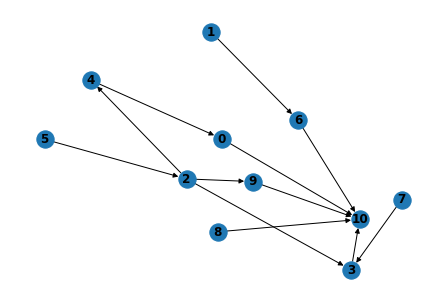

In [59]:
#DAG should have a finish
nodes = 10
edges = 10
DG, M = random_finished_dag(nodes, edges)
print(M)
writeMatrix(M, nodes, edges)
nx.draw(DG, with_labels=True, font_weight='bold')
nx.is_directed_acyclic_graph(DG)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


True

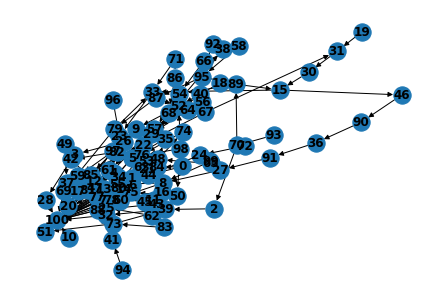

In [60]:
nodes = 100
edges = 100
DG, M = random_finished_dag(nodes, edges)
print(M)
writeMatrix(M, nodes, edges)
nx.draw(DG, with_labels=True, font_weight='bold')
nx.is_directed_acyclic_graph(DG)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


True

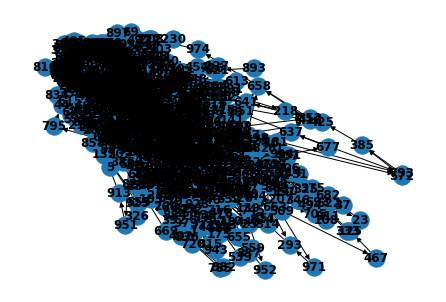

In [62]:
nodes = 1000
edges = 1000
DG, M = random_finished_dag(nodes, edges)
print(M)
writeMatrix(M, nodes, edges)
nx.draw(DG, with_labels=True, font_weight='bold')
nx.is_directed_acyclic_graph(DG)